# Overview 

Dijkstra's is an algorithm to find a shortest path in directed weighted acyclic non negative graphs.



In [1]:
import networkx as nx

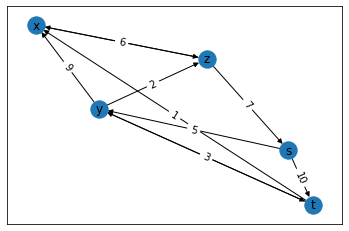

In [9]:
G = nx.DiGraph()
G.add_weighted_edges_from([
    ('s', 't', 10), 
    ('s', 'y', 5),
    
    ('t', 'y', 2),
    ('t', 'x', 1),
        
    ('y', 'z', 2),
    ('y', 'x', 9),
    ('y', 't', 3),
        
    ('x', 'z', 4),
    
    ('z', 'x', 6),
    ('z', 's', 7),
])

pos=nx.spring_layout(G)
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels);


In [1]:
from dataclasses import dataclass, field
from heapq import heappush, heappop

In [2]:
@dataclass(order=True, unsafe_hash=True)
class Vertex:
    label: str = field(hash=True)
    d: int = field(default=float('inf'), hash=False)

In [3]:
sorted([Vertex('s'), Vertex('a', 2)])

[Vertex(label='a', d=2), Vertex(label='s', d=inf)]

In [4]:
Vertex('d', 2)

Vertex(label='d', d=2)

In [5]:
def new_g():
    global V
    V = {
        's': Vertex('s'),
        't': Vertex('t'),
        'x': Vertex('x'),
        'y': Vertex('y'),
        'z': Vertex('z'),
    }
    g = {
        V['s']: [(V['t'], 10), (V['y'], 5)],
        V['t']: [(V['x'], 1), (V['y'], 2)],
        V['x']: [(V['z'], 4)],
        V['y']: [(V['z'], 2), (V['t'], 3), (V['x'], 9)],
        V['z']: [(V['x'], 6), (V['s'], 7)],
        }
    return g

In [6]:
g = new_g()
g

{Vertex(label='s', d=inf): [(Vertex(label='t', d=inf), 10),
  (Vertex(label='y', d=inf), 5)],
 Vertex(label='t', d=inf): [(Vertex(label='x', d=inf), 1),
  (Vertex(label='y', d=inf), 2)],
 Vertex(label='x', d=inf): [(Vertex(label='z', d=inf), 4)],
 Vertex(label='y', d=inf): [(Vertex(label='z', d=inf), 2),
  (Vertex(label='t', d=inf), 3),
  (Vertex(label='x', d=inf), 9)],
 Vertex(label='z', d=inf): [(Vertex(label='x', d=inf), 6),
  (Vertex(label='s', d=inf), 7)]}

In [7]:
g[V['s']]

[(Vertex(label='t', d=inf), 10), (Vertex(label='y', d=inf), 5)]

In [9]:
g[Vertex('t')]

[(Vertex(label='x', d=inf), 1), (Vertex(label='y', d=inf), 2)]

## Vertex Count

In [10]:
sorted(new_g().keys())

[Vertex(label='s', d=inf),
 Vertex(label='t', d=inf),
 Vertex(label='x', d=inf),
 Vertex(label='y', d=inf),
 Vertex(label='z', d=inf)]

## Edge Count

In [11]:
edge_cnt = 0
for v, edges in g.items():
    edge_cnt += len(edges)
edge_cnt

10

In [12]:
for v in g.keys():
    print(f"{v}")
    for edge_item in g[v]:
        print(f"{edge_item[0].label} {edge_item[1]}")
    print(f"------")

Vertex(label='s', d=inf)
t 10
y 5
------
Vertex(label='t', d=inf)
x 1
y 2
------
Vertex(label='x', d=inf)
z 4
------
Vertex(label='y', d=inf)
z 2
t 3
x 9
------
Vertex(label='z', d=inf)
x 6
s 7
------


In [13]:
def init_single_source(g, s):
    V[s].d = 0

In [14]:
init_single_source(g, 's')
g.keys()

dict_keys([Vertex(label='s', d=inf), Vertex(label='t', d=inf), Vertex(label='x', d=inf), Vertex(label='y', d=inf), Vertex(label='z', d=inf)])

In [49]:
def relax(u, v, w):
    if u.d + w < v.d:
        v.d = u.d + w
        print(f"RELAX {u.label} -> {v.label} w: {w}")
        return True
    print(f"relax try {u.label} -> {v.label} w: {w}")
    return False

assert relax(Vertex('a', 4), Vertex('b', 10), 2)
assert not relax(Vertex('a', 4), Vertex('b', 5), 2)

RELAX a -> b w: 2
relax try a -> b w: 2


In [50]:
class MinPriorityQueue:
    
    def __init__(self):
        self.arr = []
    
    def add(self, item):
        heappush(self.arr, item)
    
    def get_min(self):
        return heappop(self.arr)

In [51]:
def dijkstra(g, source):
    S = []
    
    init_single_source(g, source)

    Q = MinPriorityQueue() # min heap queue
    
    for u in g.keys():
        Q.add(u)

    i = 0
    while Q.arr:
        print(f"# {i}")
        u = Q.get_min()
        print(f"u: {u}")
        print(f"arr: {Q.arr}")
        
        
        for edge_item in g[u]:
            v = edge_item[0]
            w = edge_item[1]
            relax(u, v, w)
    
        print(f"after iter nodes: {g.keys()}")
        
        i += 1

    return None

dijkstra(new_g(), 's')

# 0
u: Vertex(label='s', d=0)
arr: [Vertex(label='t', d=inf), Vertex(label='y', d=inf), Vertex(label='x', d=inf), Vertex(label='z', d=inf)]
RELAX s -> t w: 10
RELAX s -> y w: 5
after iter nodes: dict_keys([Vertex(label='s', d=0), Vertex(label='t', d=10), Vertex(label='x', d=inf), Vertex(label='y', d=5), Vertex(label='z', d=inf)])
# 1
u: Vertex(label='t', d=10)
arr: [Vertex(label='x', d=inf), Vertex(label='y', d=5), Vertex(label='z', d=inf)]
RELAX t -> x w: 1
relax try t -> y w: 2
after iter nodes: dict_keys([Vertex(label='s', d=0), Vertex(label='t', d=10), Vertex(label='x', d=11), Vertex(label='y', d=5), Vertex(label='z', d=inf)])
# 2
u: Vertex(label='x', d=11)
arr: [Vertex(label='y', d=5), Vertex(label='z', d=inf)]
RELAX x -> z w: 4
after iter nodes: dict_keys([Vertex(label='s', d=0), Vertex(label='t', d=10), Vertex(label='x', d=11), Vertex(label='y', d=5), Vertex(label='z', d=15)])
# 3
u: Vertex(label='y', d=5)
arr: [Vertex(label='z', d=15)]
RELAX y -> z w: 2
RELAX y -> t w: 3
relax 

In [54]:
V

{'s': Vertex(label='s', d=0),
 't': Vertex(label='t', d=8),
 'x': Vertex(label='x', d=11),
 'y': Vertex(label='y', d=5),
 'z': Vertex(label='z', d=7)}

Let's print all short paths from vertex S to other nodes.

In [58]:
for u in V.values():
    print(f"Short Path: s -> {u.label} = {u.d}")

Short Path: s -> s = 0
Short Path: s -> t = 8
Short Path: s -> x = 11
Short Path: s -> y = 5
Short Path: s -> z = 7


In [69]:
init_single_source(g, 's')

In [71]:
g.keys()

dict_keys([Vertex(label='s', d=0), Vertex(label='t', d=inf), Vertex(label='x', d=inf), Vertex(label='y', d=inf), Vertex(label='z', d=inf)])

In [72]:
Q = MinPriorityQueue()
Q.arr

[]

In [73]:
for u in g.keys():
    Q.add(u)
    break
Q.arr

[Vertex(label='s', d=0)]

In [77]:
v = None
for u in g.keys():
    v = u
    break
v

Vertex(label='s', d=0)

In [1]:
from collections import OrderedDict

In [ ]:
d = OrderedDict()
d[0] = f